In [1]:
import piplite
await piplite.install('seaborn')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore", category=UserWarning) 
%matplotlib inline

<ipython-input-2-c5c9fedd4c6a>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [6]:
from pyodide.http import pyfetch 
async def download(url, filename):
    response= await pyfetch(url)
    if response.status == 200:
        with open(filename,'wb') as f:
            f.write(await response.bytes())

In [7]:
path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"

In [8]:
await download(path,'laptops.csv')
file_name='laptops.csv'

In [11]:
df=pd.read_csv(file_name)
df

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,233,233,Lenovo,4,2,1,7,14.0,0.896552,8,256,3.74850,1891,Medium,0,1
234,234,234,Toshiba,3,2,1,5,13.3,0.827586,8,256,2.64600,1950,Medium,1,0
235,235,235,Lenovo,4,2,1,5,12.0,0.896552,8,256,2.99880,2236,Medium,0,1
236,236,236,Lenovo,3,3,1,5,15.6,0.862069,6,256,5.29200,883,Low,1,0


In [13]:
lm=LinearRegression()
lm

LinearRegression()

In [16]:
x = df[['CPU_frequency']]
y = df['Price']

In [17]:
lm.fit(x,y)

LinearRegression()

In [19]:
yhat=lm.predict(x)
yhat[0:4]

array([1073.07834392, 1277.93263722, 1636.42765051, 1073.07834392])

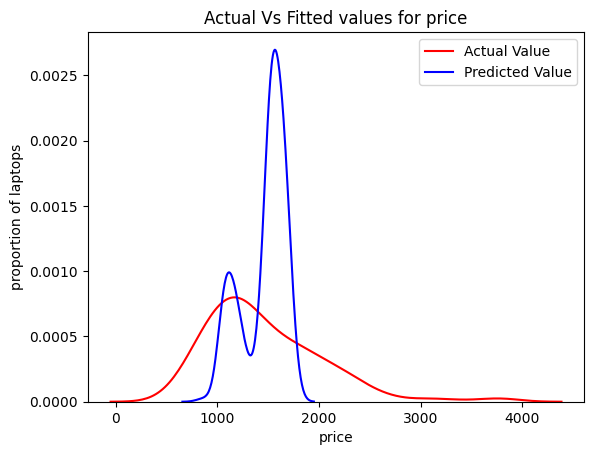

In [20]:
ax1=sns.distplot(y,hist=False, color='r',label='actual value')
sns.distplot(yhat, hist=False, color='b', label='fitted values',ax=ax1)
plt.title('Actual Vs Fitted values for price')
plt.xlabel('price')
plt.ylabel('proportion of laptops')
plt.legend(['Actual Value','Predicted Value'])
plt.show()



In [24]:
mse=mean_squared_error(df['Price'],yhat)
mse

284583.44058686297

In [27]:
r2=lm.score(x,y)
r2

0.13444363210243238

In [29]:
lm1=LinearRegression()
z= df[['CPU_frequency','RAM_GB','Storage_GB_SSD','CPU_core','OS','GPU','Category']]
lm1.fit(z,y)

LinearRegression()

In [32]:
yhat1=lm1.predict(z)
yhat1[0:4]

array([1345.51622771,  710.44905496, 1552.37242687, 1295.00681012])

In [35]:
mse1= mean_squared_error(y,yhat1)
mse1

161680.57263893107

In [40]:
r21=lm.score(x,y)
r21

0.13444363210243238

In [44]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(independent_variable.min(),independent_variable.max(),100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title(f'Polynomial Fit for Price ~ {Name}')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of laptops')

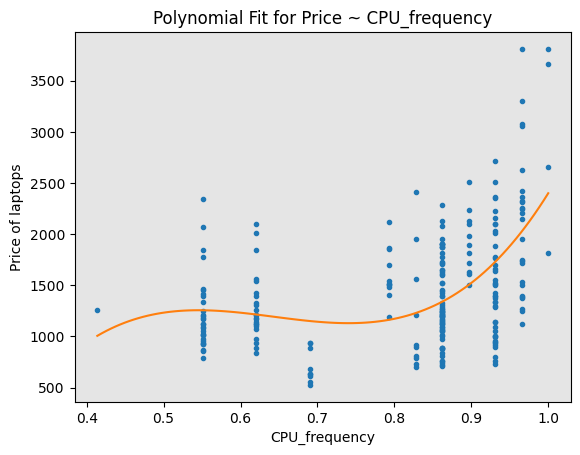

In [56]:
x = df['CPU_frequency']
y = df['Price']
f=np.polyfit(x,y,3)
p=np.poly1d(f)

PlotPolly(p,x,y,'CPU_frequency')

In [60]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe=Pipeline(Input)
Z = z.astype(float)
pipe.fit(z,Y)
ypipe=pipe.predict(z)
ypipe[0:4]

array([1371. , 1159.5, 1389. ,  -52.5])